<a href="https://colab.research.google.com/github/uzairname/Documents/blob/main/CNN_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from scipy.signal import convolve

## convolving and cross correlation

CNNs are supervised learning. Show the differences from an MLP, and motivation for images.

### an explanation

Start from a regular fully connected NN. Each input represents some feature.

Nodes in the hidden layer is some nonlinear combination of all the neurons in the layer before. Ends up with a really complicated function mapping inputs to outputs.

But For an image, there are some differences: 
1. There are too many inputs (n by n by 3 color channels) to compute a fully connected layer.
2. shifting an object in an image a little completely changes the value of pixels, but we don't care about shifts or translations.

Kernel operators and corr operation take advantage of this. (briefly explain convolve operator)


following along:

reference completed notebook..

In [ ]:






def corr2d(X, K):

    h, w = K.shape
    Y = jnp.zeros((X.shape[0] - h + 1, X.shape[1] - w + 1))
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            Y = Y.at[i, j].set((X[i:i + h, j:j + w] * K).sum())


    return Y






In [ ]:
import pandas as pd
import numpy as np
import torch
import torchvision



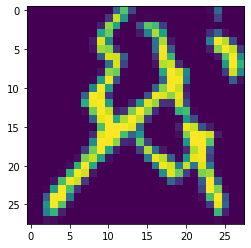

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(np.array(x_train[-1][0][0]))

In [ ]:
from torchshape import tensorshape

shape = tensorshape(nn.Conv2d(1, 6, 3), [4, 1, 28, 28])
shape = tensorshape(nn.MaxPool2d(2, 2), shape)
shape = tensorshape(nn.Conv2d(6, 10, 5), shape)
shape = tensorshape(nn.MaxPool2d(2, 2), shape)

print(shape)

# Data


In [ ]:
import torch
import numpy as np
import torchvision
from torchvision.datasets import KMNIST

from torch.utils.data import random_split

train = KMNIST(root="data", train=True, download=True, transform=torchvision.transforms.ToTensor())
test = KMNIST(root="data", train=False, download=True, transform=torchvision.transforms.ToTensor())

all = KMNIST(root="data", download=True, transform=torchvision.transforms.ToTensor())

batch_size = 64
loader_train = torch.utils.data.DataLoader(train, batch_size=64)
loader_test = torch.utils.data.DataLoader(test, batch_size=64)


TypeError: ignored

## PyTorch CNN

In [ ]:
from inspect import modulesbyfile
import torch
import torch.nn as nn
import torch.nn.functional as F

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

n_classes = 10

class CNN(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=20, kernel_size=(5, 5)) # play around with number of channels in hidden layer. Why do we need so many channels?
    self.relu1 = nn.ReLU()
    self.pool1 = nn.MaxPool2d(kernel_size=(2, 2), stride=(2, 2))
  
    self.conv2 = nn.Conv2d(in_channels=20, out_channels=50, kernel_size=(5, 5))
    self.relu2 = nn.ReLU()
    self.pool2 = nn.MaxPool2d(kernel_size=(2, 2), stride=(2, 2))
  
    self.fc1 = nn.Linear(in_features=800, out_features=500)
    self.relu3 = nn.ReLU()
  
    self.fc2 = nn.Linear(in_features=500, out_features=10)
    self.logSoftmax = nn.LogSoftmax(dim=1)

  def forward(self, x):
    x = self.pool1(self.relu1(self.conv1(x)))
    x = self.pool2(self.relu2(self.conv2(x)))
    x = torch.flatten(x, 1)
    x = self.relu3(self.fc1(x))
    result = self.logSoftmax(self.fc2(x))
    return result


model = CNN()



In [ ]:
# train things


lossfn = nn.NLLLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

%timeit
model.train()
running_loss = 0
for epoch in range(2):

  for i, batch in enumerate(loader_train):

    x, y = batch
    x, y = (x.to(device), y.to(device))

    optimizer.zero_grad()

    outputs = model(x)
    loss = lossfn(outputs, y)
    loss.backward()
    optimizer.step()

    running_loss += loss

    if (i%200 == 0):
      print(i, running_loss/200)
      running_loss = 0



0 tensor(0.0115, grad_fn=<DivBackward0>)
200 tensor(1.2412, grad_fn=<DivBackward0>)
400 tensor(0.3931, grad_fn=<DivBackward0>)
600 tensor(0.2453, grad_fn=<DivBackward0>)
800 tensor(0.1951, grad_fn=<DivBackward0>)
0 tensor(0.1158, grad_fn=<DivBackward0>)
200 tensor(0.1488, grad_fn=<DivBackward0>)
400 tensor(0.1245, grad_fn=<DivBackward0>)
600 tensor(0.1002, grad_fn=<DivBackward0>)
800 tensor(0.1004, grad_fn=<DivBackward0>)


In [ ]:
dataiter = iter(loader_test)
images, labels = next(dataiter)

correct = 0
total = 0
with torch.no_grad():
    for data in loader_test:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()


print(f'{100 * correct // total} %')

91 %


## Lenet

In [ ]:
!pip install pyimagesearch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement pyimagesearch (from versions: none)
ERROR: No matching distribution found for pyimagesearch


In [ ]:
from pyimagesearch.lenet import LeNet

trainData = KMNIST(root="data", train=True, download=True,
	transform=ToTensor())
testData = KMNIST(root="data", train=False, download=True,
	transform=ToTensor())


ModuleNotFoundError: ignored

(tensor(2),
 tensor([-0.1035,  0.2049, -0.1048,  0.1518, -0.2468,  0.0553,  0.2121, -0.1158,
         -0.1200, -0.0190], grad_fn=<SelectBackward0>))

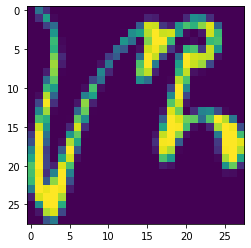

In [ ]:
net.eval()

import matplotlib.pyplot as plt

dataiter = iter(loader_test)
images, labels = next(dataiter)

outputs = net(images)

plt.imshow(images[0][0])
labels[0], outputs[0]

https://www.kaggle.com/competitions/imagenet-object-localization-challenge/data

dataset
https://www.image-net.org/challenges/LSVRC/2017/index.php#

Google CNN
https://static.googleusercontent.com/media/research.google.com/en//pubs/archive/43022.pdf


https://towardsdatascience.com/topological-data-analysis-tda-b7f9b770c951


Stanford
https://www.youtube.com/watch?v=bNb2fEVKeEo&list=PL3FW7Lu3i5JvHM8ljYj-zLfQRF3EO8sYv&index=5